##1.0 Data Collection - Loading dataset to memory


In [ ]:
import pandas as pd
data = pd.read_csv('maternal_risk.csv')
data.head()

Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk

##2.0 Exploratory Data Analysis

###2.1 Descriptive Analysis

In [ ]:
# checking number of rows and columns in the dataset
data.shape

(1014, 7)

In [ ]:
# checking statistical measures about the dataset
data.describe()

Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate  
count  1014.000000  
mean     74.301775  
std       8.088702  
min       7.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000

In [ ]:
#Checking Feature Type in the Dataset
data.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [ ]:
# getting some information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
#Checking for unique variables
data.nunique()

Age            50
SystolicBP     19
DiastolicBP    16
BS             29
BodyTemp        8
HeartRate      16
RiskLevel       3
dtype: int64

In [ ]:
# checking for missing values
data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [ ]:
#Checking for Data Balance in the Target Variable
data['RiskLevel'].value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

##Check For Outliers

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Number of inliers: 964
Number of outliers: 50


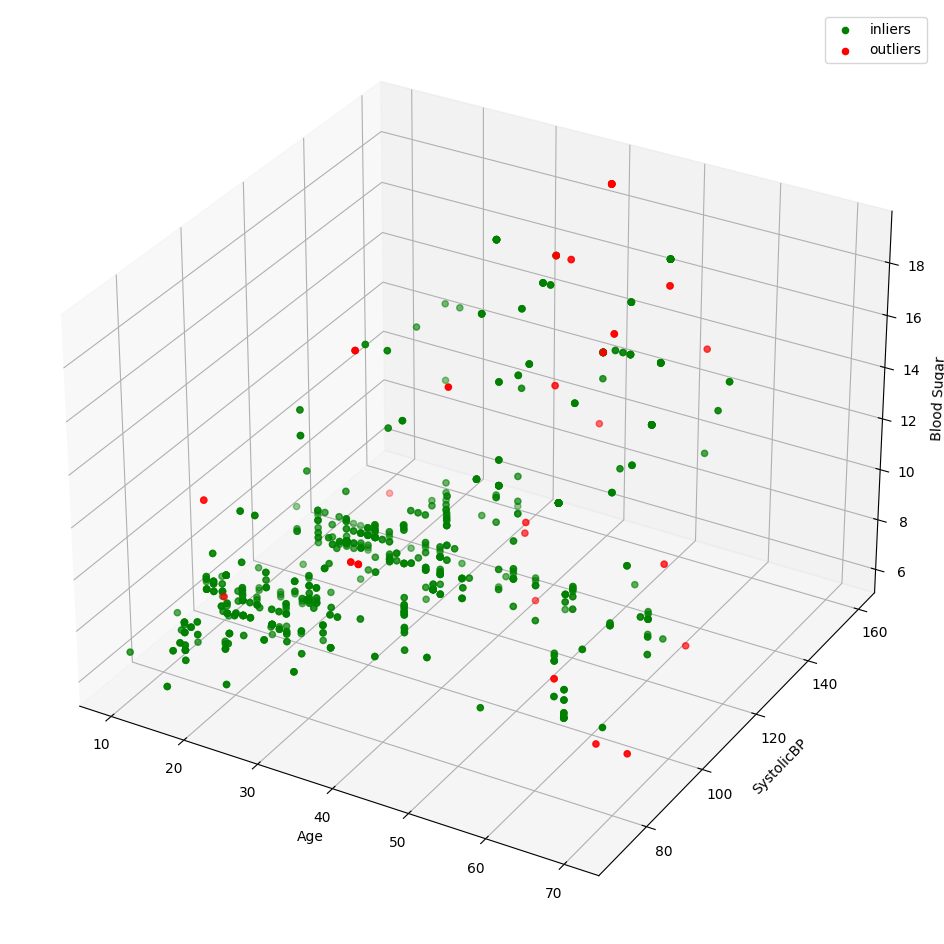

In [ ]:
#Checking for outliers using IsolationForest
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Select continuous numerical variables
num_cols = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']

# Set contamination level
contamination = 0.05

# Create IsolationForest object
clf = IsolationForest(contamination=contamination, random_state=42)

# Fit the data and predict the inliers and outliers
y_pred = clf.fit_predict(data[num_cols])

# Extract the inliers and outliers
inliers = data.loc[y_pred == 1, num_cols]
outliers = data.loc[y_pred == -1, num_cols]

# Print the inliers and outliers count
print('Number of inliers:', len(inliers))
print('Number of outliers:', len(outliers))

# Plot the inliers and outliers in 3D using Matplotlib
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(inliers['Age'], inliers['SystolicBP'], inliers['BS'], c='green', label='inliers')
ax.scatter(outliers['Age'], outliers['SystolicBP'], outliers['BS'], c='red', label='outliers')
ax.set_xlabel('Age')
ax.set_ylabel('SystolicBP')
ax.set_zlabel('Blood Sugar')
ax.legend()
plt.show()

###2.2 Visualisation

##2.2.1 Univariate Analysis

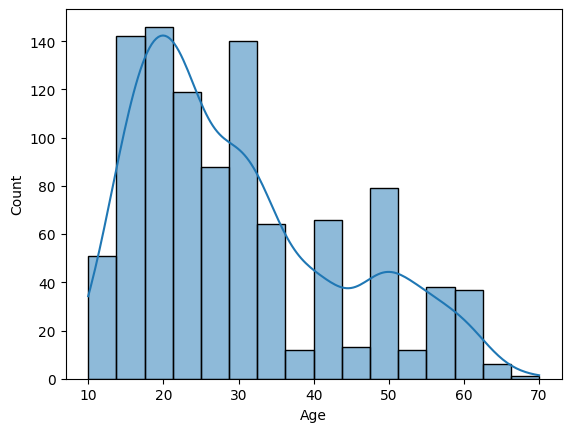

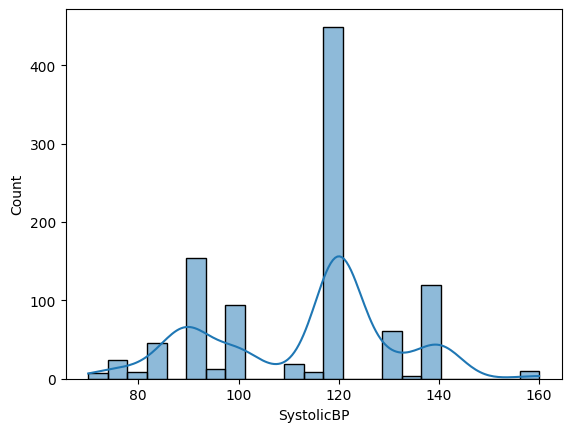

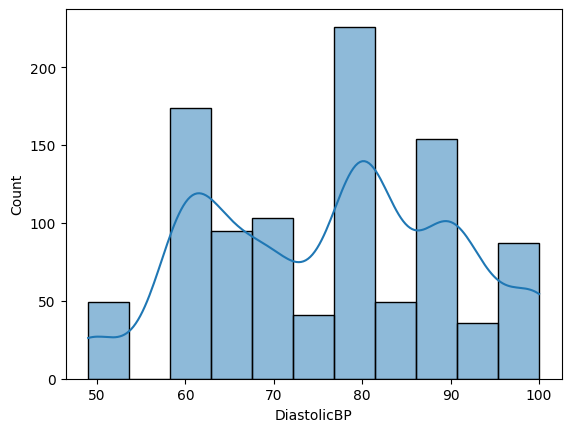

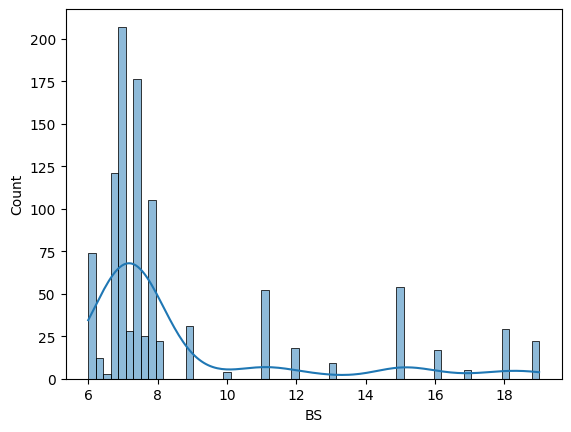

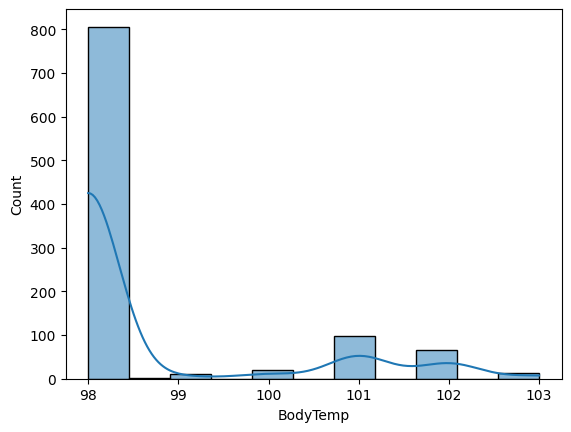

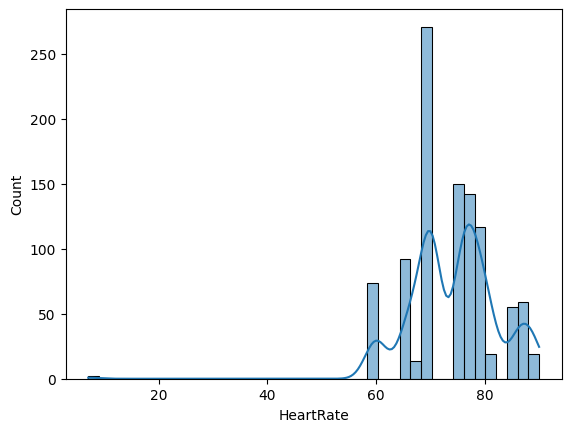

In [ ]:
#Histogram of all continous variables
import seaborn as sns
import matplotlib.pyplot as plt

#Histogram of all continous variables
def plot_histograms(data):
    cols = ['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate']
    for col in cols:
        sns.histplot(data=data, x=col, kde=True)
        plt.show()

# Call the function with the data
plot_histograms(data)


<ipython-input-155-db062eae3032>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x=i, shade=True)


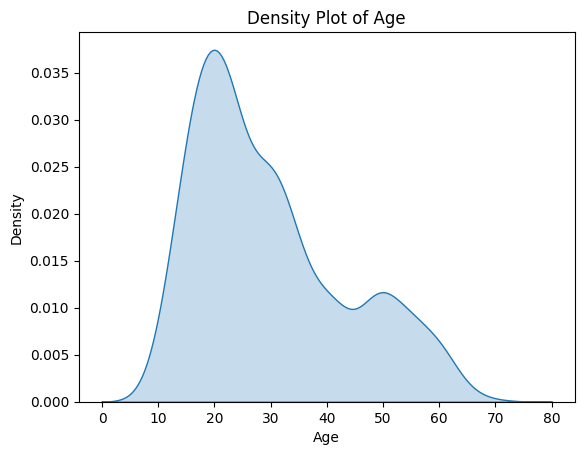

<ipython-input-155-db062eae3032>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x=i, shade=True)


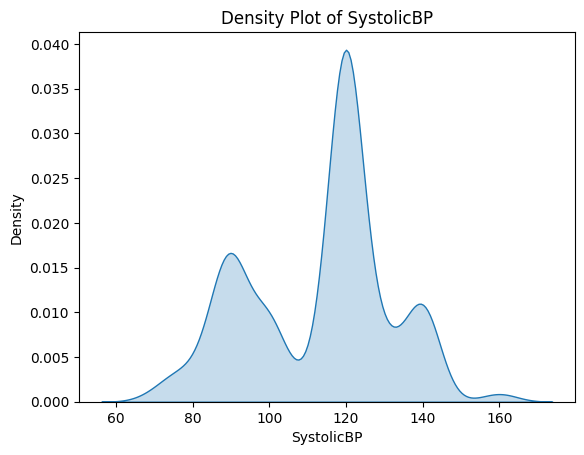

<ipython-input-155-db062eae3032>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x=i, shade=True)


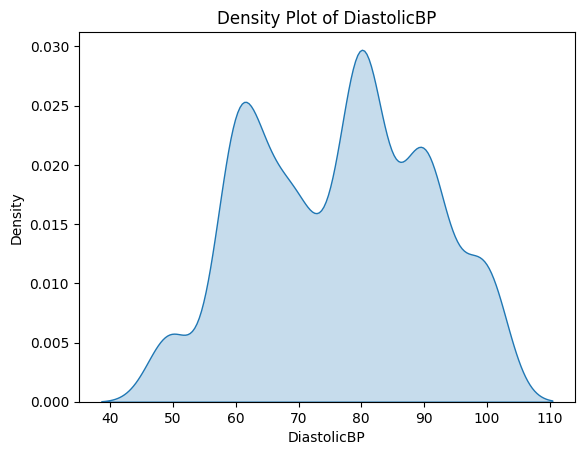

<ipython-input-155-db062eae3032>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x=i, shade=True)


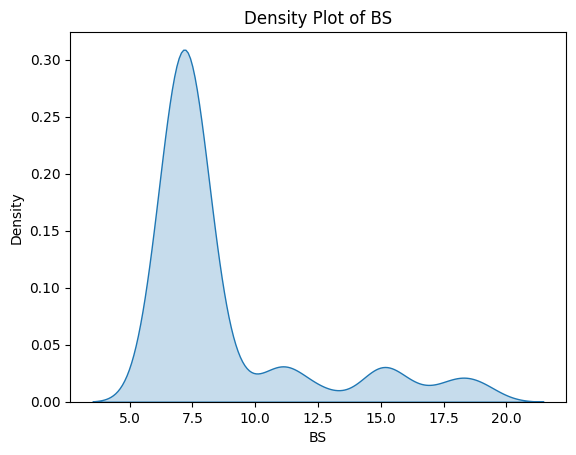

<ipython-input-155-db062eae3032>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x=i, shade=True)


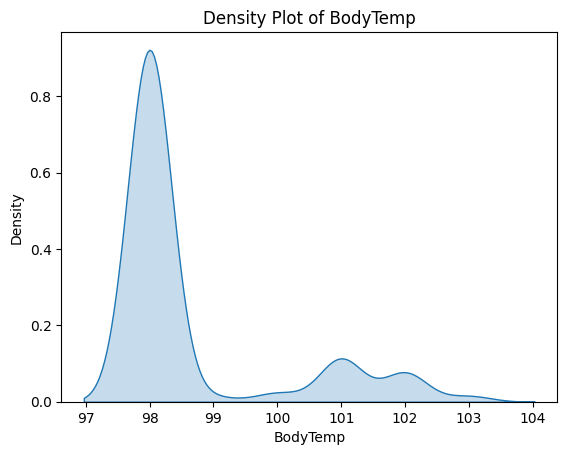

<ipython-input-155-db062eae3032>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x=i, shade=True)


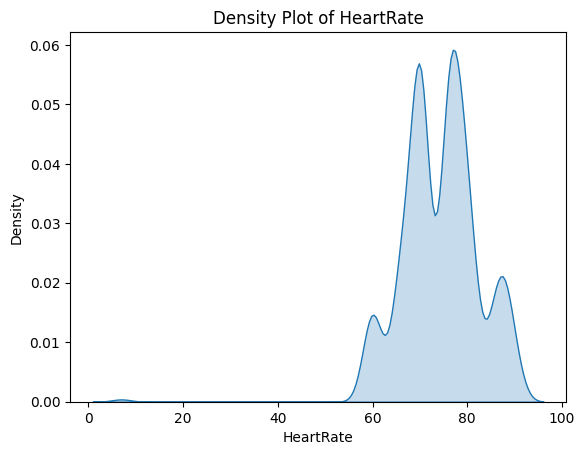

In [ ]:
# Density plot of all continous variables
cols = ['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate']
for i in cols:
  sns.kdeplot(data=data, x=i, shade=True)
  plt.title("Density Plot of {}".format(i))
  plt.show()

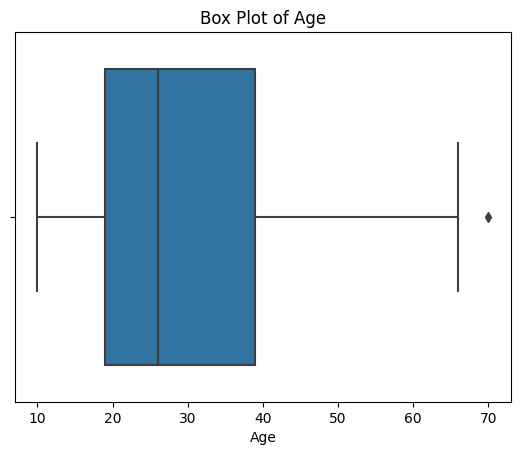

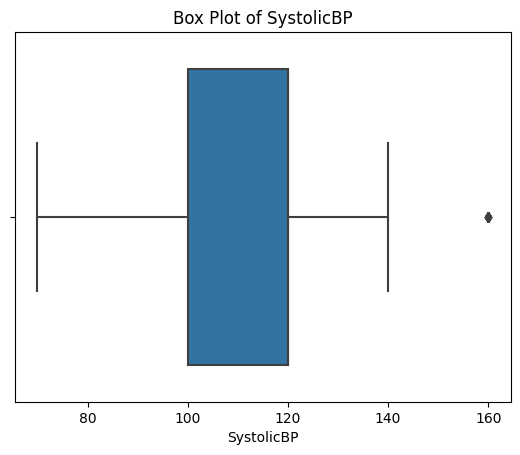

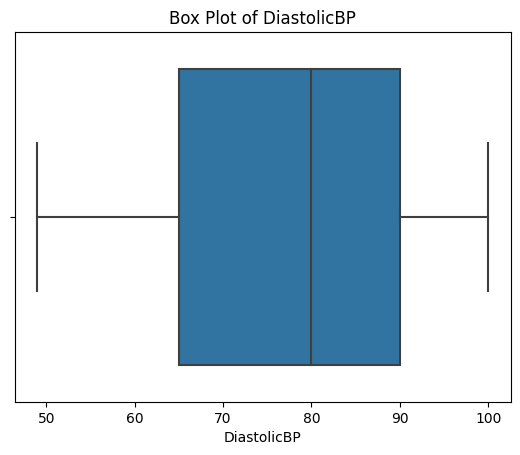

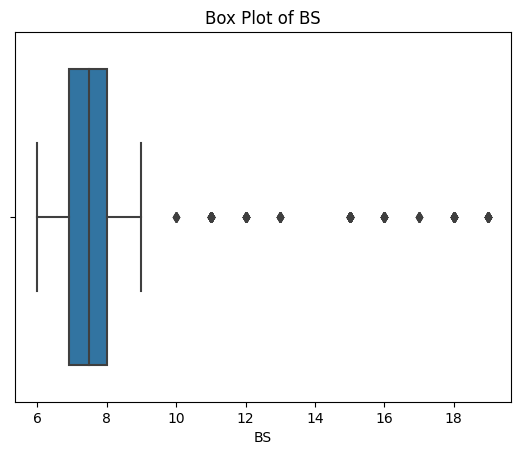

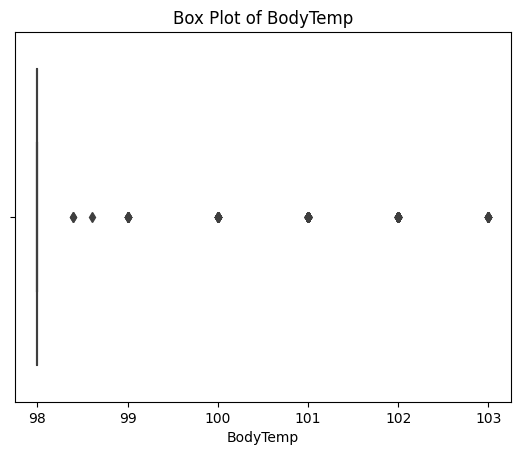

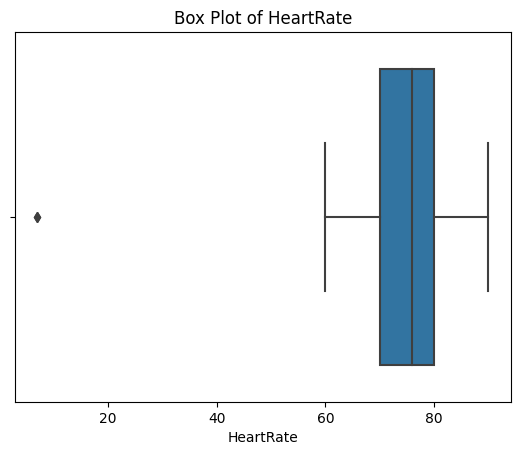

In [ ]:
# Boxplot of all continous variables
cols = ['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate']
for i in cols:
  sns.boxplot(data=data, x=i)
  plt.title("Box Plot of {}".format(i))
  plt.show()

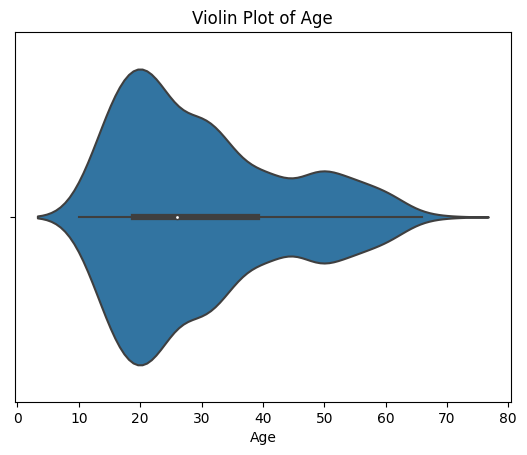

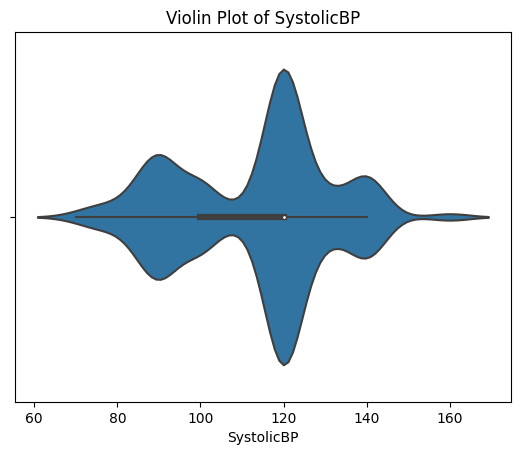

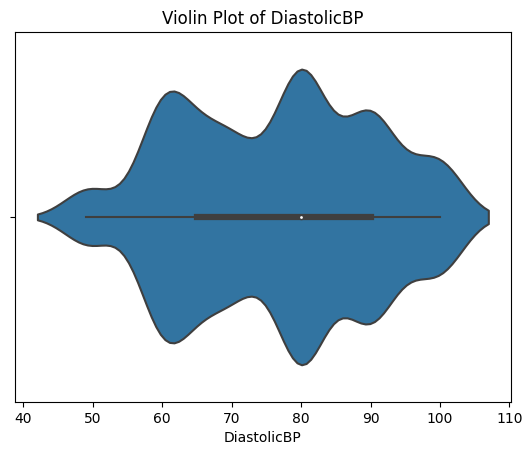

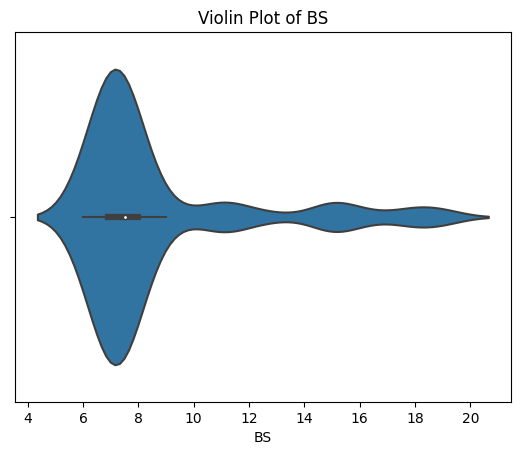

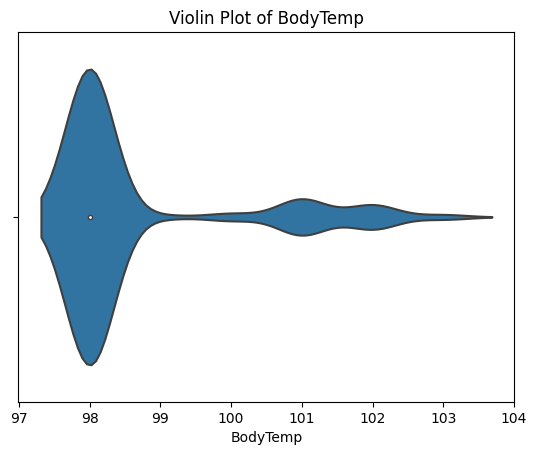

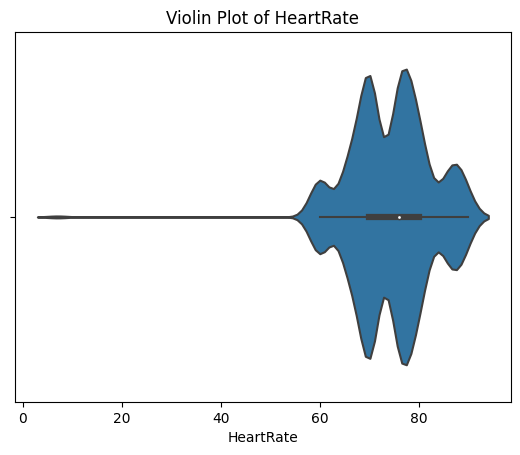

In [ ]:
# Violin plot of all continous variables
cols = ['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate']
for i in cols:
  sns.violinplot(data=data, x=i)
  plt.title("Violin Plot of {}".format(i))
  plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 12.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


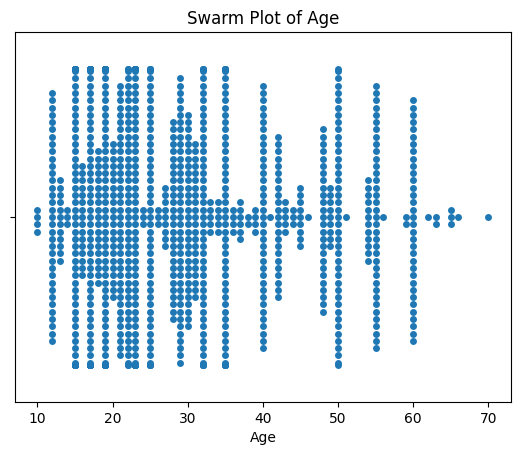

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 66.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


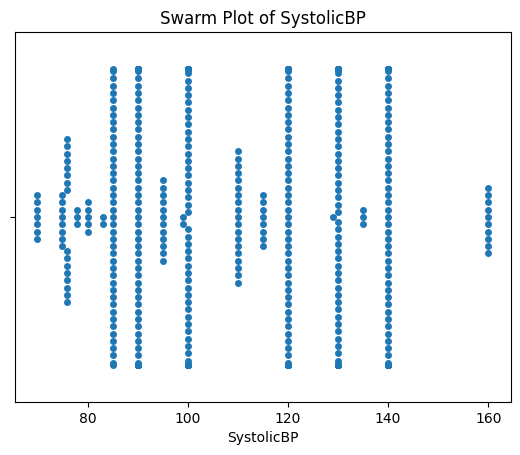

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 58.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


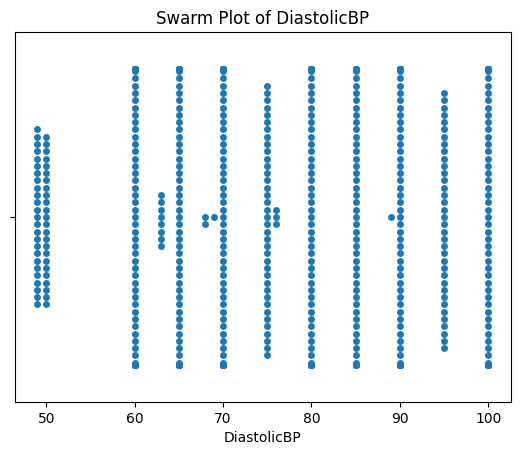

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 50.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


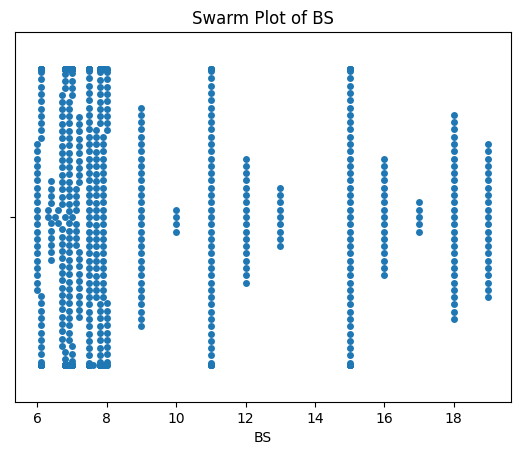

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 42.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 83.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


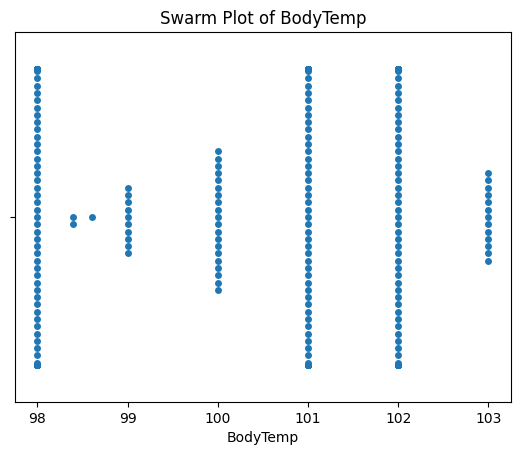

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 63.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


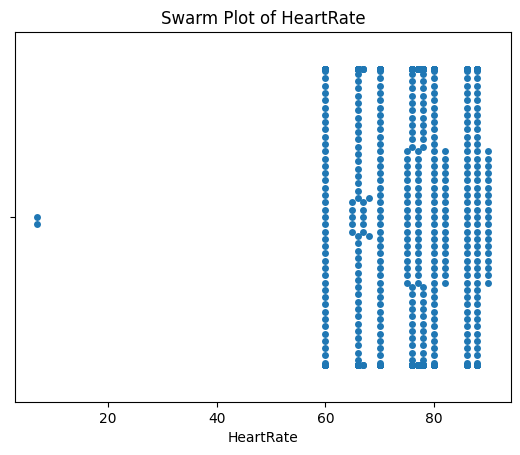

In [ ]:
# Swarm plot of all continous variables
cols = ['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate']
for i in cols:
  sns.swarmplot(data=data, x=i)
  plt.title("Swarm Plot of {}".format(i))
  plt.show()

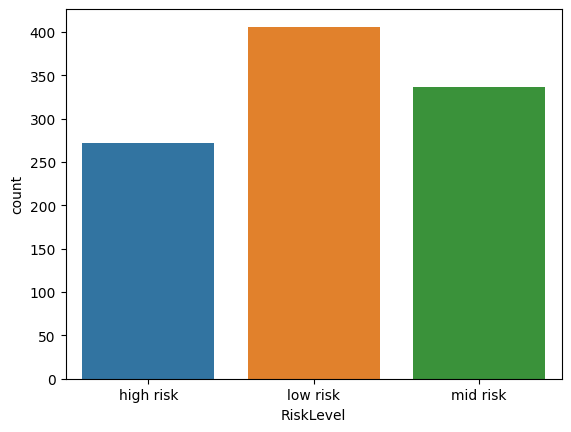

In [ ]:
# Bar Chart of RiskLevel
sns.countplot(x="RiskLevel", data=data)
plt.show()

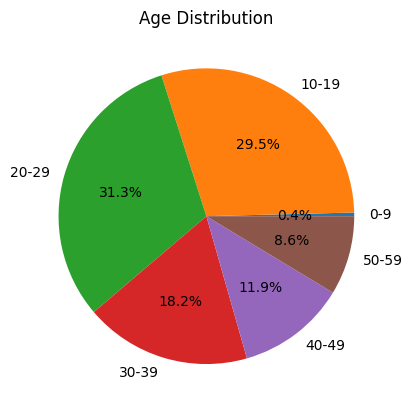

In [ ]:
# Pie chart of Age Distribution of 10 years intervals
bins = range(0, 70, 10) # create bins of 10 years
age_groups = pd.cut(data['Age'], bins=bins)
age_dist = age_groups.value_counts().sort_index()
labels = [f"{b.left}-{b.right-1}" for b in age_dist.index]
plt.pie(age_dist, labels=labels, autopct='%1.1f%%')
plt.title("Age Distribution")
plt.show()

##2.2.2 Bivariate and Multivariate analysis

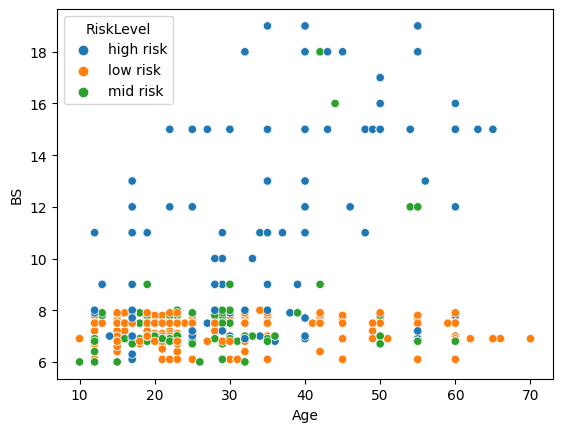

In [ ]:
# Scatter plot of Age vs. Blood Sugar (BS)
cols = ['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate']
sns.scatterplot(data=data, x='Age', y='BS', hue='RiskLevel')
plt.show()

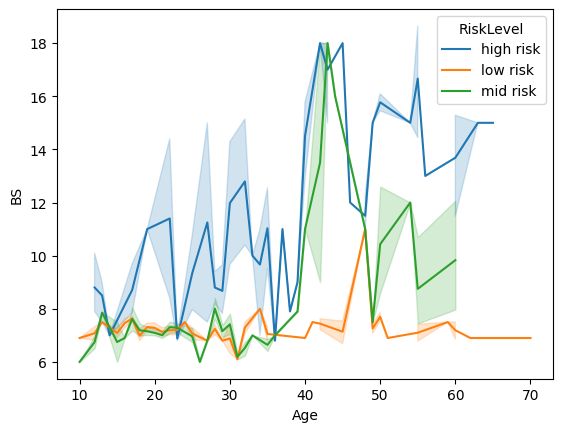

In [ ]:
# Line plot of Age vs. Blood Sugar
sns.lineplot(data=data, x='Age', y='BS', hue='RiskLevel')
plt.show()

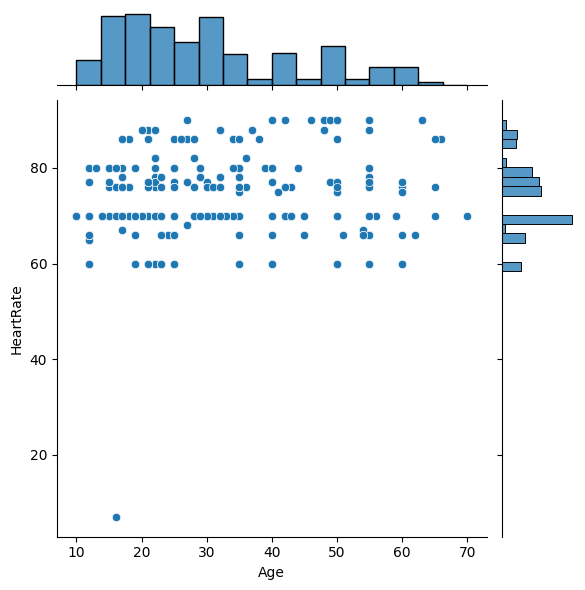

In [ ]:
# Joint plot of Age vs. HeartRate
sns.jointplot(data=data, x='Age', y='HeartRate', kind='scatter')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 52.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 67.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 57.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 59.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 72.7% of the points cannot be plac

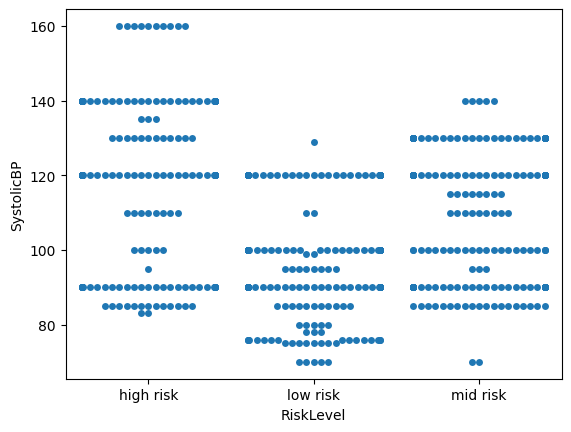

In [ ]:
# Swarm plot of Risk Level vs. Systolic Blood Pressure
sns.swarmplot(data=data, x='RiskLevel', y='SystolicBP')
plt.show()

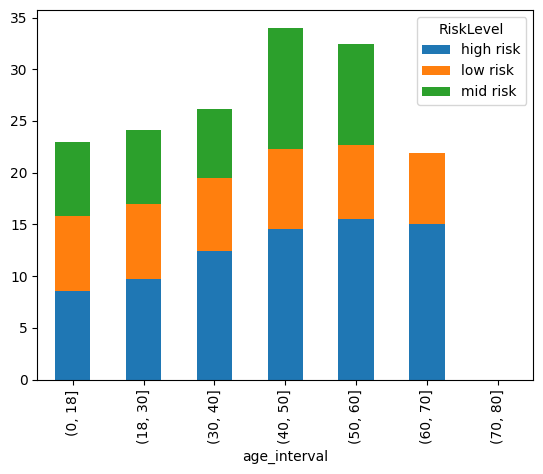

In [ ]:
#Stacked bar plot of Risk Level vs. Blood Sugar, grouped by age intervals
data['age_interval'] = pd.cut(data['Age'], bins=[0, 18, 30, 40, 50, 60, 70, 80])
age_blood_sugar = data.groupby(['age_interval', 'RiskLevel']).mean()['BS'].unstack()
age_blood_sugar.plot(kind='bar', stacked=True)
plt.show()

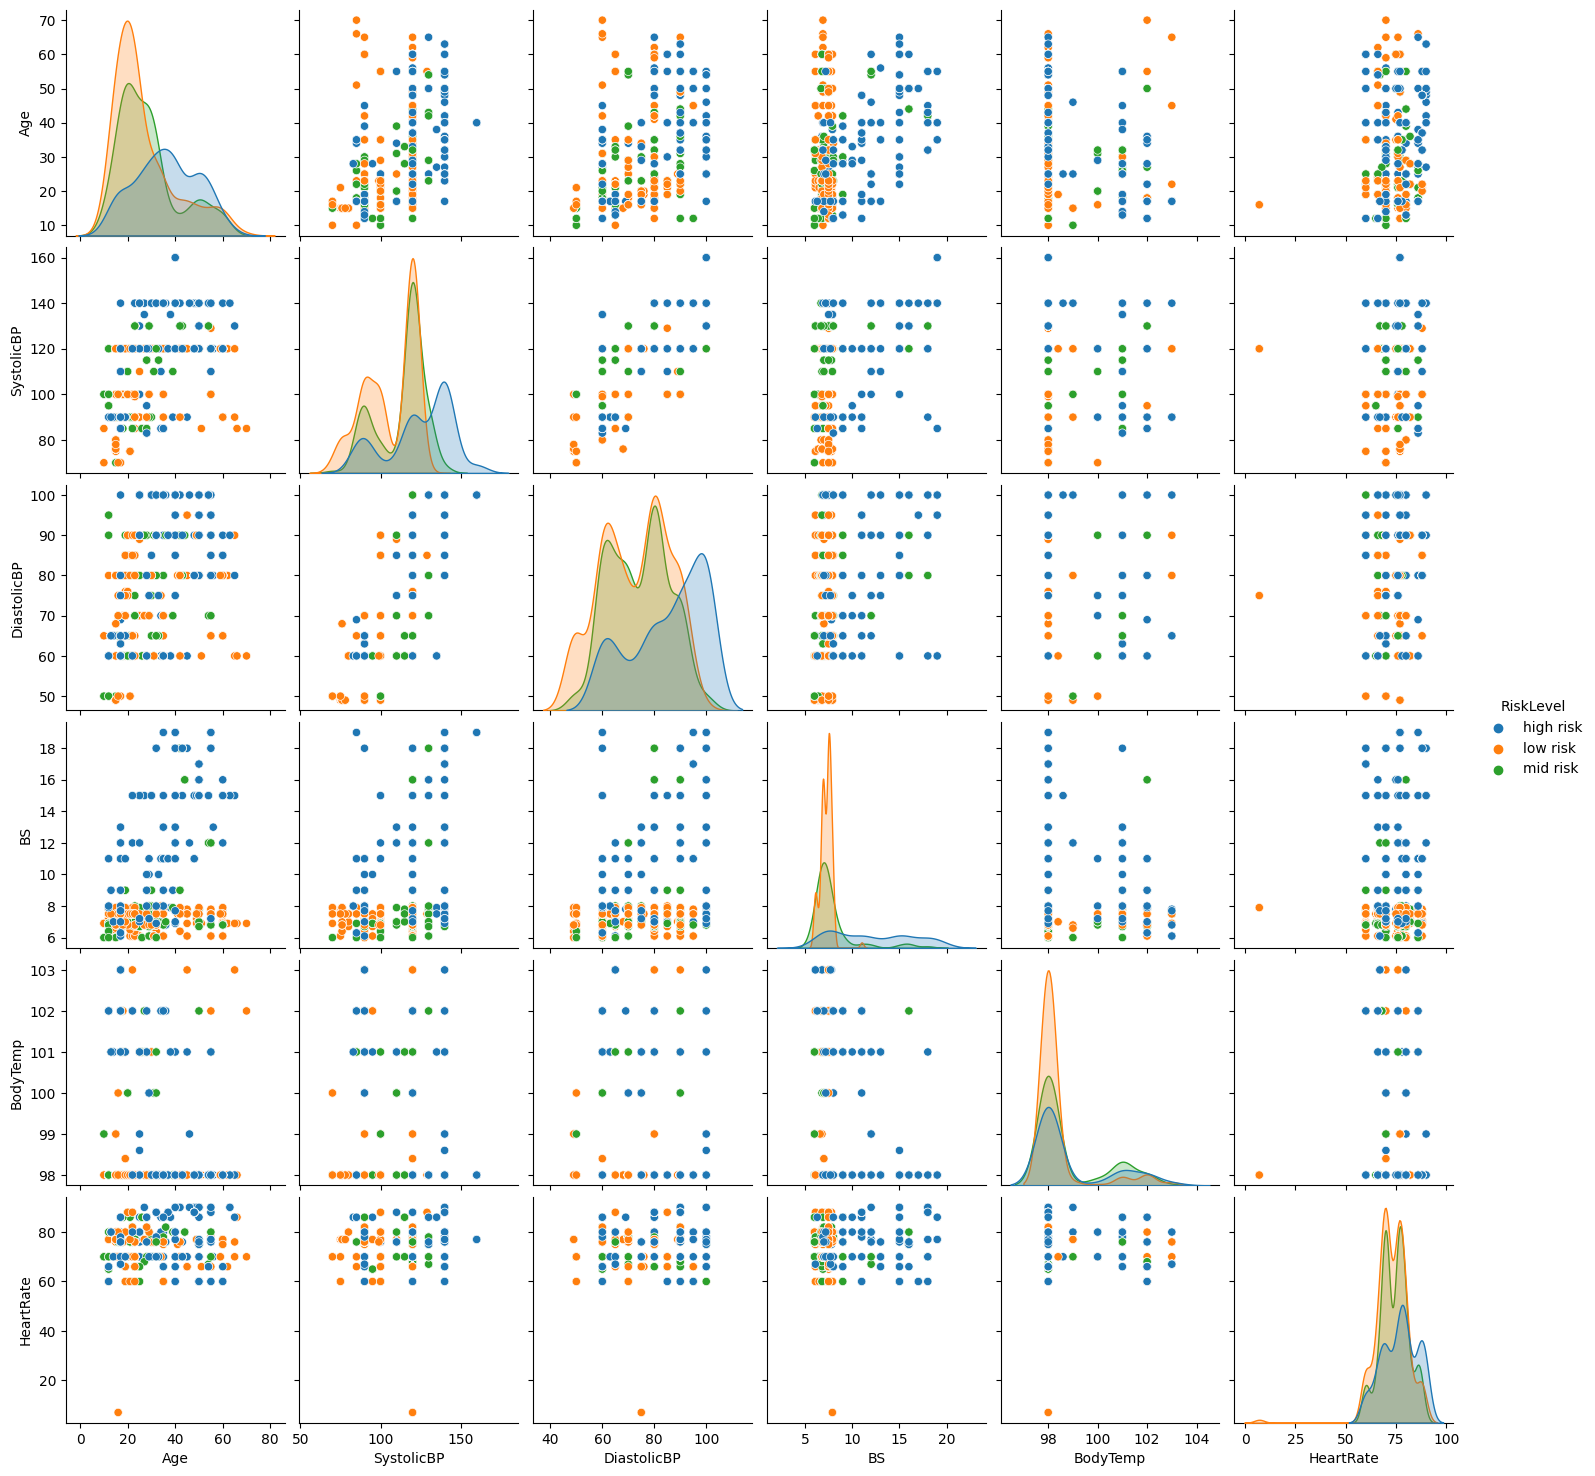

In [ ]:
#Pairplot of all continuous variables, colored by Risk Level
sns.pairplot(data=data, vars=['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate'], hue="RiskLevel")
plt.show()

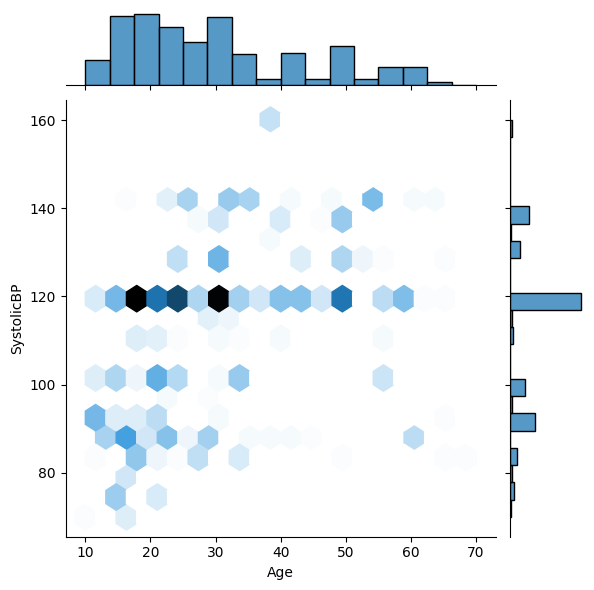

In [ ]:
sns.jointplot(data=data, x="Age", y="SystolicBP", kind="hex")
plt.show()

Text(0.5, 0, 'Systolic Blood Pressure')

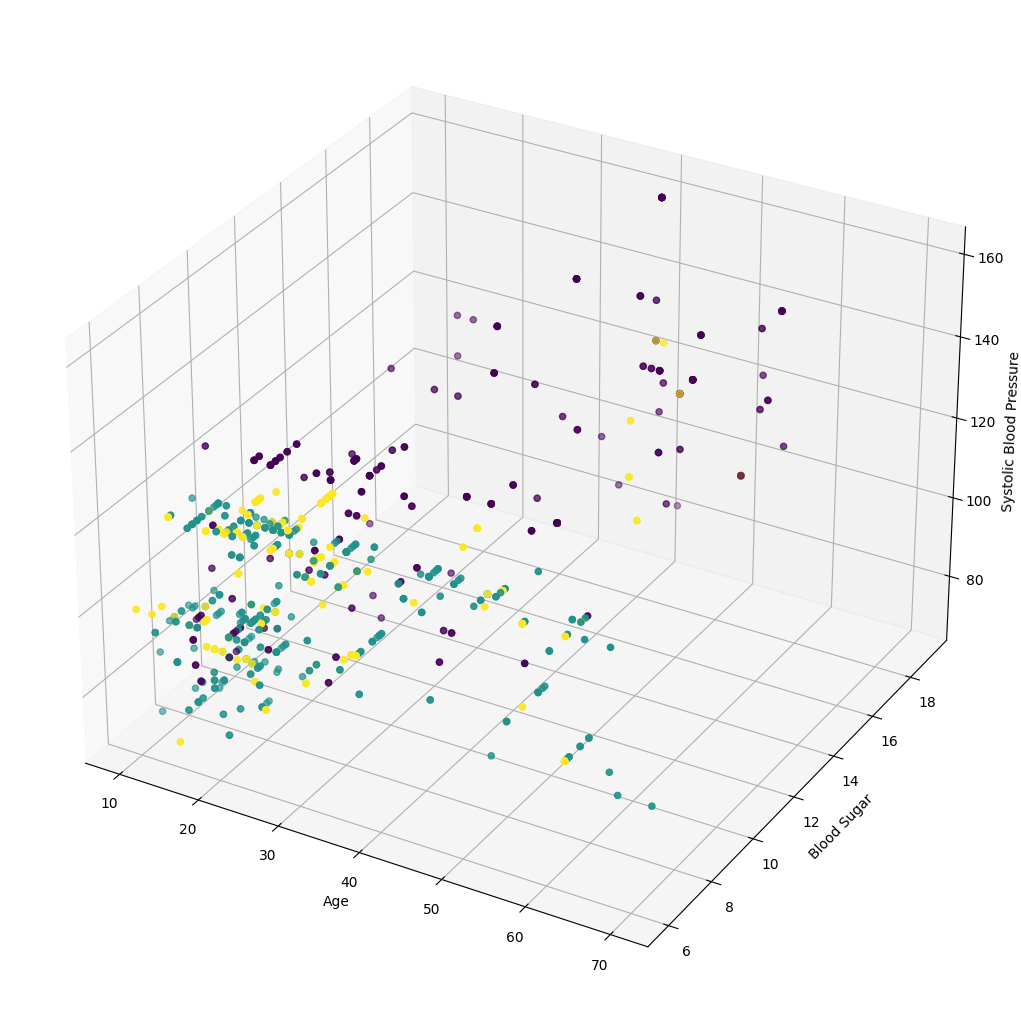

In [ ]:
# 3D scatter plot of Age, Blood Sugar and Systolic Blood Pressure
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(data["Age"], data["BS"], data["SystolicBP"], c=pd.factorize(data["RiskLevel"])[0])
ax.set_xlabel("Age")
ax.set_ylabel("Blood Sugar")
ax.set_zlabel("Systolic Blood Pressure")

<Axes: xlabel='BS'>

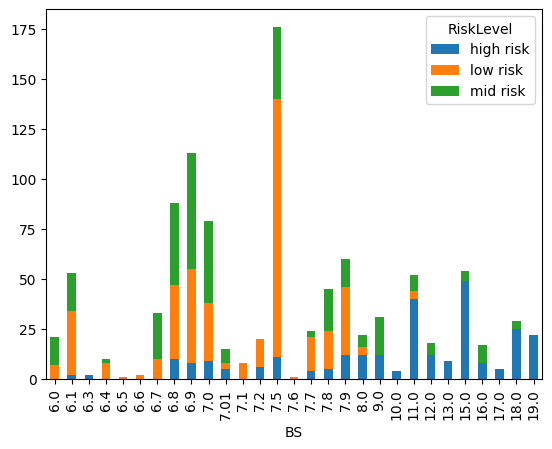

In [ ]:
# Stacked bar chart of Risk Level by Blood Sugar level
df_age_bloodsugar = data.groupby(["BS", "RiskLevel"]).size().reset_index(name="count")
df_age_bloodsugar_pivot = df_age_bloodsugar.pivot_table(index=["BS"], columns="RiskLevel", values="count")
df_age_bloodsugar_pivot.plot(kind="bar", stacked=True)

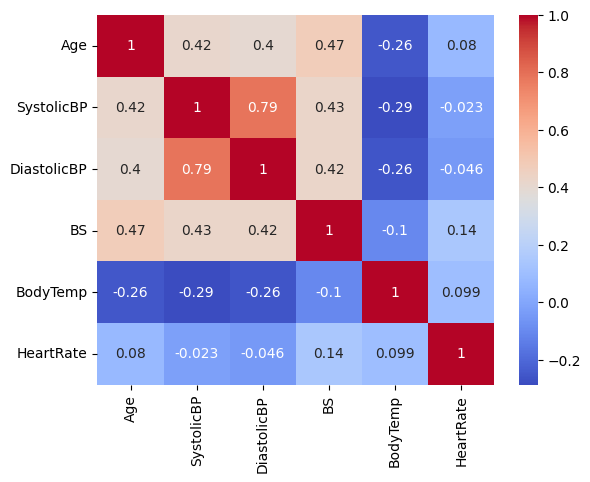

In [ ]:
# Heatmap of pairwise correlations between all continuous variables
corr_matrix = data[['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

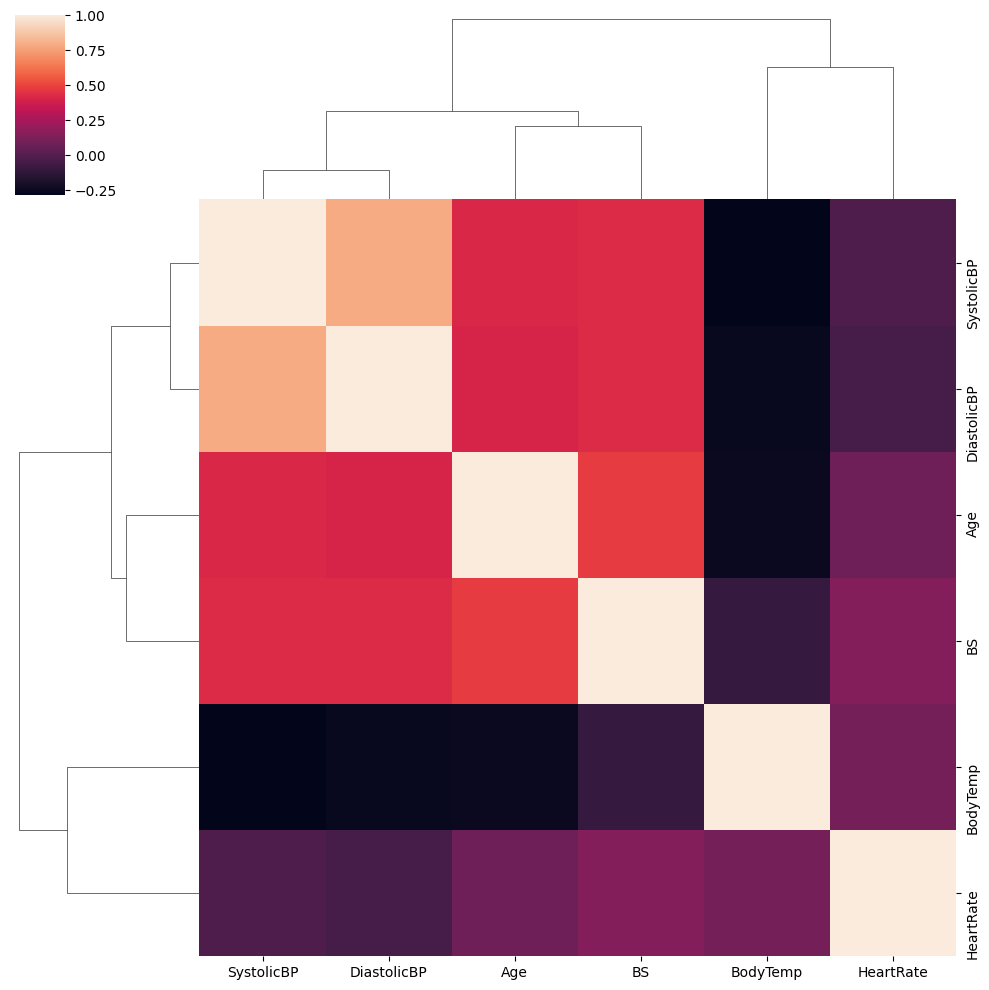

In [ ]:
# Clustered heatmap of all variables
sns.clustermap(data=data[["Age", "SystolicBP", "DiastolicBP", "BS", "BodyTemp", "HeartRate"]].corr())

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:1138: UserWarning: cmap parameter ignored when using hue mapping.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Age', ylabel='SystolicBP'>

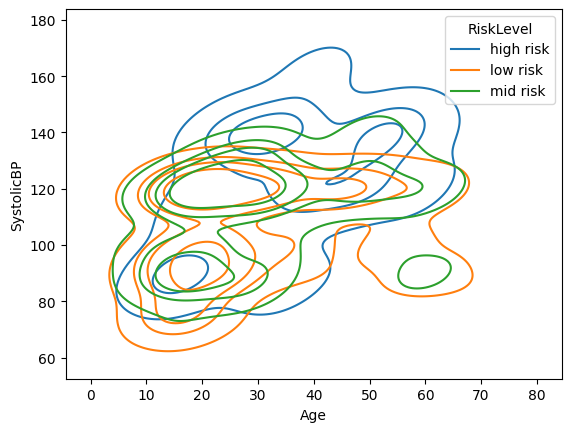

In [ ]:
# Contour plot of Age and Systolic Blood Pressure with color-coded Risk Level
sns.kdeplot(data=data, x="Age", y="SystolicBP", hue="RiskLevel", levels=5, cmap="coolwarm")

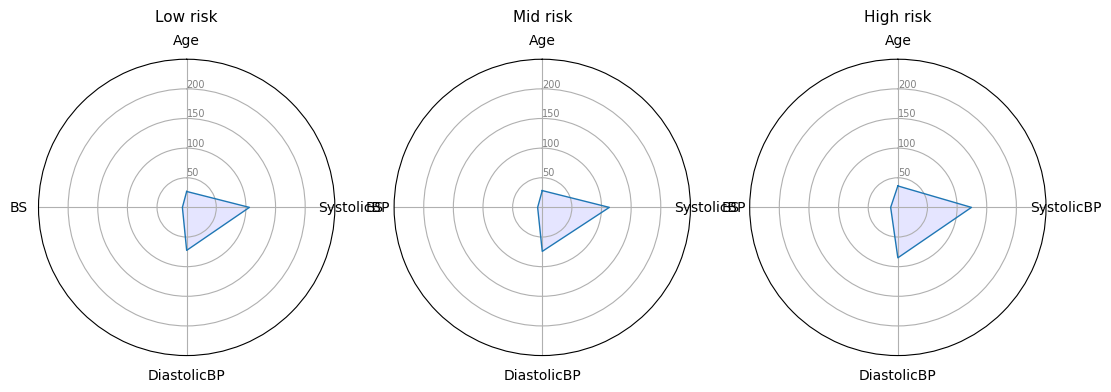

In [ ]:
# Radar chart of all variables for each Risk Level
import numpy as np
fig = plt.figure(figsize=(13, 13))
categories = ["Age", "SystolicBP", "DiastolicBP", "BS"]
for risk_level in ["low risk", "mid risk", "high risk"]:
    df_risk = data[data["RiskLevel"] == risk_level]
    values = df_risk[categories].mean().tolist()
    values += values[:1]
    angles = [n / float(len(categories)) * 2 * np.pi for n in range(len(categories))]
    angles += angles[:1]
    ax = plt.subplot(1, 3, ["low risk", "mid risk", "high risk"].index(risk_level) + 1, polar=True)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories)
    ax.set_rlabel_position(0)
    plt.yticks([50, 100, 150, 200], ["50", "100", "150", "200"], color="grey", size=7)
    plt.ylim(0, 250)
    ax.plot(angles, values, linewidth=1, linestyle="solid")
    ax.fill(angles, values, "b", alpha=0.1)
    ax.set_title(risk_level.capitalize(), size=11, color="black", y=1.1)


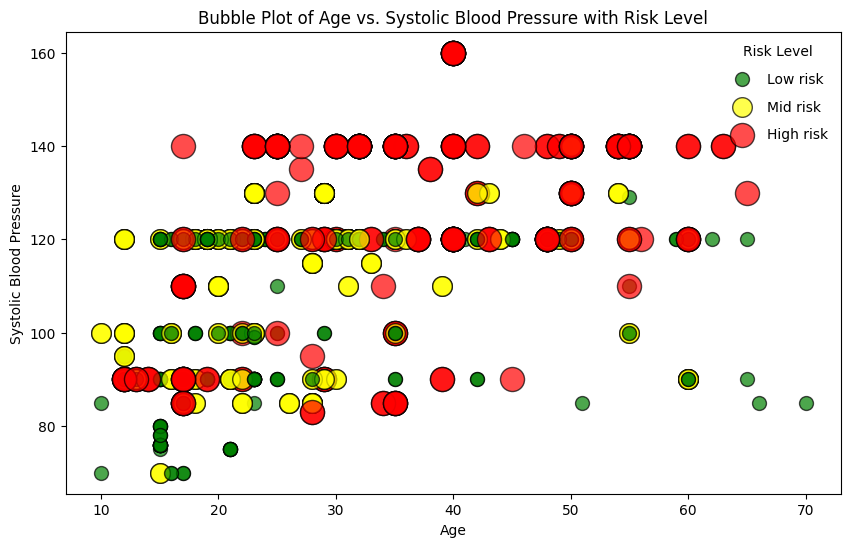

In [ ]:
# bubbles Plot of Age vs. Systolic BP
# Generate sample data
age = data['Age']
sbp = data['SystolicBP']
bs = data['BS']
risk_level = data['RiskLevel']
color_map = {'low risk': 'green', 'mid risk': 'yellow', 'high risk': 'red'}
size_map = {'low risk': 100, 'mid risk': 200, 'high risk': 300}

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(len(age)):
    ax.scatter(age[i], sbp[i], s=size_map[risk_level[i]], alpha=0.7, c=color_map[risk_level[i]], edgecolors='black')

# Add axis labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Systolic Blood Pressure')
ax.set_title('Bubble Plot of Age vs. Systolic Blood Pressure with Risk Level')

# Add a legend
for risk, color in color_map.items():
    ax.scatter([], [], c=color, alpha=0.7, s=size_map[risk], edgecolors='black', label=risk.capitalize())
ax.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Risk Level', loc='upper right')

# Show the plot
plt.show()


## 2.2.3 Interactive Visualization Integration - Tableau Style

In [ ]:
!pip install pygwalker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.9/620.9 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pygwalker as pyg
pyg.walk(data)

### 2.3 Clustering Analysis

2.3.1 First Approach - KMean Clustering 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


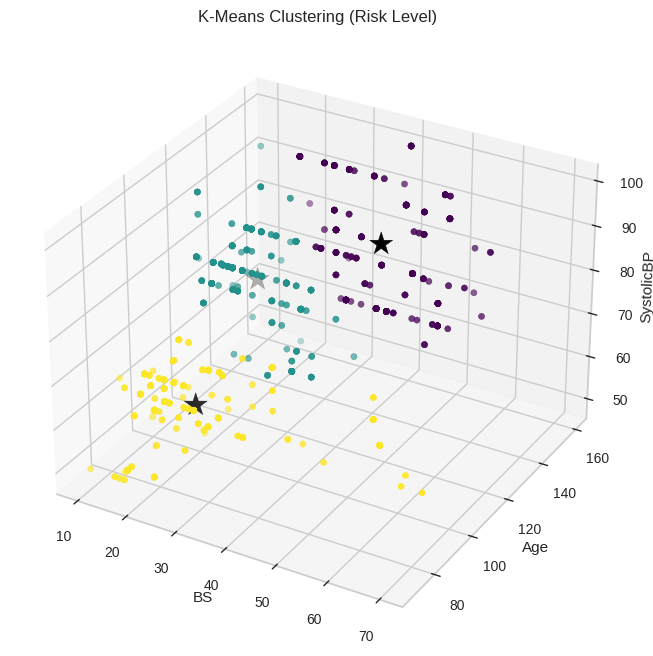

Cluster  0  has  287  observations.
Cluster  1  has  401  observations.
Cluster  2  has  326  observations.


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Convert target variable to numerical
target_map = {'low risk': 0, 'mid risk': 1, 'high risk': 2}
data['RiskLevel'] = data['RiskLevel'].map(target_map)

# Extract independent variables
X = data.iloc[:,:-1]

# Build K-Means model and fit to data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Count number of observations centered around each centroid
counts = np.zeros(3)
for i in range(3):
    counts[i] = sum(labels == i)

# Visualize clusters in 3D scatter plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=labels, cmap='viridis')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='*', s=300, c='#050505')
ax.set_xlabel('BS')
ax.set_ylabel('Age')
ax.set_zlabel('SystolicBP')
ax.set_title('K-Means Clustering (Risk Level)')
plt.show()

# Print counts for each cluster
for i in range(3):
    print("Cluster ", i, " has ", int(counts[i]), " observations.")

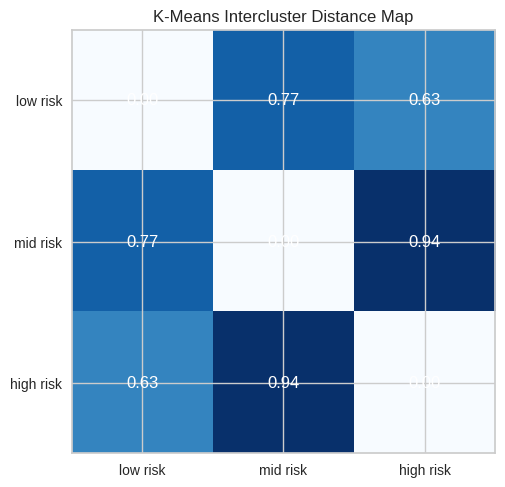

In [ ]:
# Plot K-Means intercluster distance map
import numpy as np
distances = np.zeros((3,3))

centroids = np.random.rand(3, 3)

for i in range(3):
    for j in range(3):
        distances[i][j] = np.linalg.norm(centroids[i] - centroids[j])
        
fig, ax = plt.subplots()
im = ax.imshow(distances, cmap='Blues')

# Add axis labels
ax.set_xticks(np.arange(len(target_map)))
ax.set_yticks(np.arange(len(target_map)))
ax.set_xticklabels(target_map.keys())
ax.set_yticklabels(target_map.keys())

# Add text annotations for values in matrix
for i in range(len(target_map)):
    for j in range(len(target_map)):
        text = ax.text(j, i, format(distances[i][j], '.2f'),
                       ha="center", va="center", color="w")

# Add title and show plot
ax.set_title("K-Means Intercluster Distance Map")
plt.show()

2.3.2 Second Approach - K Nearest Neighbor 

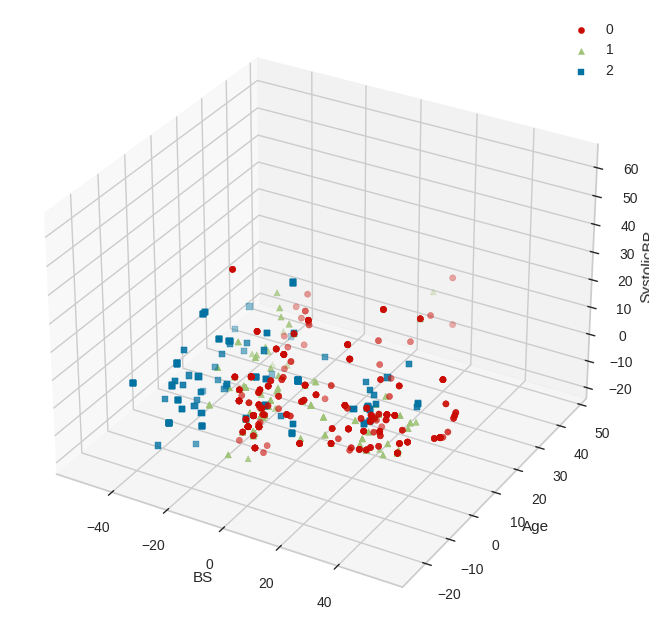

Cluster 0: 448 observations
Cluster 1: 313 observations
Cluster 2: 253 observations


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

y = data.iloc[:,-1]
# Apply PCA to reduce the dimensionality
pca = PCA(n_components=3)
X = pca.fit_transform(X)

# Cluster the data using K-Nearest neighbor with 3 clusters
knn = KNeighborsClassifier()
knn.fit(X,y)
labels = knn.predict(X)

# Plot the clusters in a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b']
markers = ['o', '^', 's']
for i, label in enumerate(np.unique(labels)):
    ax.scatter(X[labels == label, 0],
               X[labels == label, 1],
               X[labels == label, 2],
               c=colors[i],
               marker=markers[i],
               label=label)
ax.set_xlabel('BS')
ax.set_ylabel('Age')
ax.set_zlabel('SystolicBP')
plt.legend()
plt.show()

# Print the number of observations connected to each cluster
for label in np.unique(labels):
    print(f"Cluster {label}: {len(X[labels == label])} observations")

## 3.0 Feature Selection

### 3.1 First Approach - Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Split the dataset into independent variables (X) and target variable (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Create a random forest classifier object
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a recursive feature elimination object
rfe = RFE(estimator=rf, n_features_to_select=1, step=1)

# Fit the RFE object to the data
rfe.fit(X, y)

# Print the ranking output with column names
ranking_data = pd.DataFrame({'Feature Ranking': rfe.ranking_, 'Feature Name': X.columns})
ranking_data = ranking_data.sort_values('Feature Ranking')
print(ranking_data)

   Feature Ranking Feature Name
3                1           BS
0                2          Age
1                3   SystolicBP
2                4  DiastolicBP
5                5    HeartRate
4                6     BodyTemp


###3.2 Second Approach - Tree Based Feature Selection

In [ ]:
# Create a random forest classifier object
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model and get feature importances
rf.fit(X, y)
importances = rf.feature_importances_

# Sort the features by their importance in descending order
sorted_importances, sorted_features = zip(*sorted(zip(importances, X.columns), reverse=True))

# Print the sorted features with their importance scores
for feature, importance in zip(sorted_features, sorted_importances):
    print("%s: %.4f" % (feature, importance))

BS: 0.3658
SystolicBP: 0.1830
Age: 0.1602
DiastolicBP: 0.1230
HeartRate: 0.1051
BodyTemp: 0.0628


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


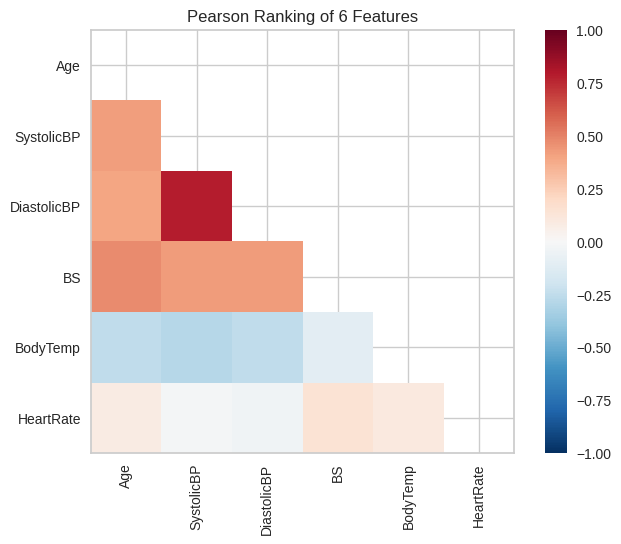

<Axes: title={'center': 'Pearson Ranking of 6 Features'}>

In [ ]:
!pip install yellowbrick
from yellowbrick.features import Rank2D

# Plot 20: Rank2D plot of all variables
features = ['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate']
X = data[features].values
visualizer = Rank2D(features=features)
visualizer.fit_transform(X)
visualizer.show()

##4.0 Classification Modelling

4.1 First Experimentation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
def build_models(data):
    # Split the dataset into independent variables (X) and target variable (y)
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build the models
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    svm = SVC(kernel='linear', random_state=42)
    dt = DecisionTreeClassifier(random_state=42)
    lr = LogisticRegression(random_state=42)

    # Train the models
    rf.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    dt.fit(X_train, y_train)
    lr.fit(X_train, y_train)

    # Evaluate the models
    rf_preds = rf.predict(X_test)
    svm_preds = svm.predict(X_test)
    dt_preds = dt.predict(X_test)
    lr_preds = lr.predict(X_test)

    rf_scores = [accuracy_score(y_test, rf_preds), precision_score(y_test, rf_preds, average='weighted'),
                 recall_score(y_test, rf_preds, average='weighted'), f1_score(y_test, rf_preds, average='weighted')]
    svm_scores = [accuracy_score(y_test, svm_preds), precision_score(y_test, svm_preds, average='weighted'),
                  recall_score(y_test, svm_preds, average='weighted'), f1_score(y_test, svm_preds, average='weighted')]
    dt_scores = [accuracy_score(y_test, dt_preds), precision_score(y_test, dt_preds, average='weighted'),
                 recall_score(y_test, dt_preds, average='weighted'), f1_score(y_test, dt_preds, average='weighted')]
    lr_scores = [accuracy_score(y_test, lr_preds), precision_score(y_test, lr_preds, average='weighted'),
                 recall_score(y_test, lr_preds, average='weighted'), f1_score(y_test, lr_preds, average='weighted')]

    # Create a Pandas dataframe to store the model scores
    model_scores_df = pd.DataFrame({'Random Forest': rf_scores,
                                     'Support Vector': svm_scores,
                                     'Decision Tree': dt_scores,
                                     'Logistic Regression': lr_scores},
                                     index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

    return model_scores_df


In [ ]:
# Load the dataset
data = pd.read_csv('maternal_risk.csv')

# Build and evaluate the models
model_scores = build_models(data)

# Print the model scores
print(model_scores)

           Random Forest  Support Vector  Decision Tree  Logistic Regression
Accuracy        0.812808        0.660099       0.817734             0.630542
Precision       0.818523        0.680266       0.820975             0.671383
Recall          0.812808        0.660099       0.817734             0.630542
F1 Score        0.813376        0.622838       0.817855             0.601082


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


4.2 Second Experimentation

In [ ]:

import time

def evaluate_models(data):
    # Split data into independent and target variables
    X = data.iloc[:,:-1]
    y = data.iloc[:,-1]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define models
    models = {'Random Forest': RandomForestClassifier(n_estimators=100),
              'Support Vector Machine': SVC(),
              'Decision Tree': DecisionTreeClassifier(),
              'Logistic Regression': LogisticRegression()}

    # Train and evaluate models
    results = []
    for name, model in models.items():
        start_time = time.time()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        end_time = time.time()
        time_taken = end_time - start_time
        f1 = f1_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        accuracy = accuracy_score(y_test, y_pred)
        results.append({'Model': name,
                        'F1 Score': f1,
                        'Precision': precision,
                        'Recall': recall,
                        'Accuracy': accuracy,
                        'Time Taken (seconds)': time_taken})

    # Return results as a pandas dataframe
    results_df = pd.DataFrame(results)
    return results_df

In [ ]:
data = pd.read_csv('maternal_risk.csv')
results = evaluate_models(data)
print(results)

                    Model  F1 Score  Precision    Recall  Accuracy  \
0           Random Forest  0.818020   0.822443  0.817734  0.817734   
1  Support Vector Machine  0.563098   0.645409  0.596059  0.596059   
2           Decision Tree  0.807888   0.812619  0.807882  0.807882   
3     Logistic Regression  0.601082   0.671383  0.630542  0.630542   

   Time Taken (seconds)  
0              0.249198  
1              0.042482  
2              0.005680  
3              0.039387  


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##5.0 Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

def hyperparameter_tuning(X, y):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the hyperparameter grids for the random forest and decision tree models
    rf_param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None]
    }
    dt_param_grid = {
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None]
    }

    # Create grid search objects for the random forest and decision tree models
    rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, scoring='f1_macro')
    dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, scoring='f1_macro')

    # Fit the grid search objects to the training data
    rf_grid.fit(X_train, y_train)
    dt_grid.fit(X_train, y_train)

    # Get the best hyperparameters and scores for the random forest and decision tree models
    rf_best_params = rf_grid.best_params_
    rf_best_score = rf_grid.best_score_
    dt_best_params = dt_grid.best_params_
    dt_best_score = dt_grid.best_score_

    # Train the random forest and decision tree models using the best hyperparameters   
    rf = RandomForestClassifier(random_state=42, **rf_best_params)
    dt = DecisionTreeClassifier(random_state=42, **dt_best_params)
    rf.fit(X_train, y_train)
    dt.fit(X_train, y_train)

    # Compute the evaluation metrics for the random forest and decision tree models
    rf_pred = rf.predict(X_test)
    dt_pred = dt.predict(X_test)
    rf_accuracy = accuracy_score(y_test, rf_pred)
    dt_accuracy = accuracy_score(y_test, dt_pred)
    rf_recall = recall_score(y_test, rf_pred, average='macro')
    dt_recall = recall_score(y_test, dt_pred, average='macro')
    rf_precision = precision_score(y_test, rf_pred, average='macro')
    dt_precision = precision_score(y_test, dt_pred, average='macro')
    rf_f1 = f1_score(y_test, rf_pred, average='macro')
    dt_f1 = f1_score(y_test, dt_pred, average='macro')

    # Print the results
    print("Random Forest:")
    print("Best hyperparameters:", rf_best_params)
    print("F1 score: %.4f" % rf_f1)
    print("Precision: %.4f" % rf_precision)
    print("Recall: %.4f" % rf_recall)
    print("Accuracy: %.4f" % rf_accuracy)
    print()
    print("Decision Tree:")
    print("Best hyperparameters:", dt_best_params)
    print("F1 score: %.4f" % dt_f1)
    print("Precision: %.4f" % dt_precision)
    print("Recall: %.4f" % dt_recall)
    print("Accuracy: %.4f" % dt_accuracy)

    # Return the results as a dictionary
    results = {
        'rf_best_params': rf_best_params,
        'rf_f1': rf_f1,
        'rf_precision': rf_precision,
        'rf_recall': rf_recall,
        'rf_accuracy': rf_accuracy,
        'dt_best_params': dt_best_params,
        'dt_f1': dt_f1,
        'dt_precision': dt_precision,
        'dt_recall': dt_recall,
        'dt_accuracy': dt_accuracy
    }
    return results

results = hyperparameter_tuning(X, y)

Random Forest:
Best hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
F1 score: 0.8280
Precision: 0.8345
Recall: 0.8273
Accuracy: 0.8227

Decision Tree:
Best hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
F1 score: 0.8210
Precision: 0.8218
Recall: 0.8227
Accuracy: 0.8177
